In [7]:
# Preprocessing Phase

import pandas as pd
import spacy

# Load the dataset
df = pd.read_csv('D:/Important_Documents/shrey_asisgnment/fake-news/train.csv')

# Sample a subset of data for analysis
sample_df = df.iloc[:5000, :]
print(sample_df.head(5))
print("Before Cleaning")
print(sample_df.isnull().sum())
sample_df = sample_df.dropna()

print("After Cleaning")
print(sample_df.isnull().sum())

# Combining title and text columns for full content
sample_df['content'] = sample_df['title'] + ' ' + sample_df['text']

# Dropping unnecessary columns
sample_df.drop(columns=['author', 'title', 'text', 'id'], inplace=True)

print(sample_df)

# Load spaCy model for tokenization and lemmatization
nlp = spacy.load("en_core_web_sm")

# Drop rows with NaN values in 'content' column
sample_df = sample_df.dropna(subset=['content'])

# Tokenization and Lemmatization using spaCy
sample_df['tokenized_content'] = sample_df['content'].apply(
    lambda x: ' '.join([
        token.lemma_
        for token in nlp(x)
        if token.is_alpha and not token.is_stop and not token.is_punct and not token.is_space
    ])
)

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  
Before Cleaning
id          0
title     142
author    478
text       11
label       0
dtype: int64
After Cleaning
id        0
title     0
author   

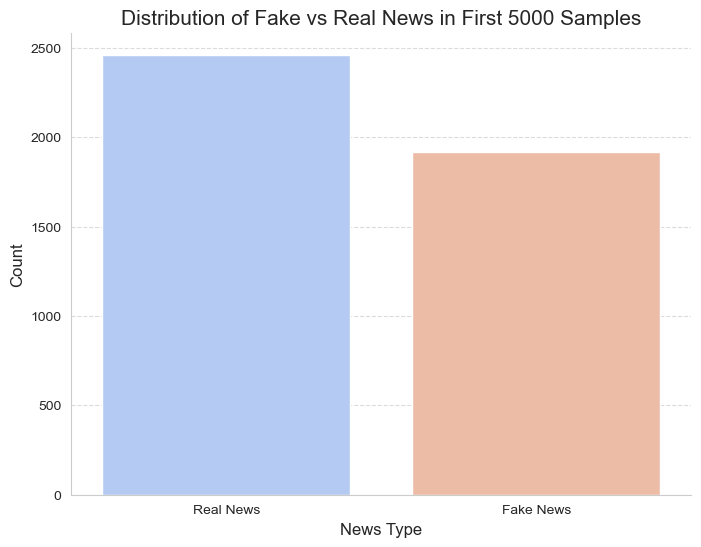

In [19]:
# 2. Exploratory Data Analysis (EDA) Phase
# !pip install wordcloud
!pip install TextBlob


import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

# Count plot for the distribution of fake vs real news
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=sample_df, palette='coolwarm')
plt.title('Distribution of Fake vs Real News in First 5000 Samples', fontsize=15)
plt.xlabel('News Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Real News', 'Fake News'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()  # Removes the top and right spines
plt.savefig("D:\Important_Documents\shrey_asisgnment\Final_output\count_plot.png")
plt.show()


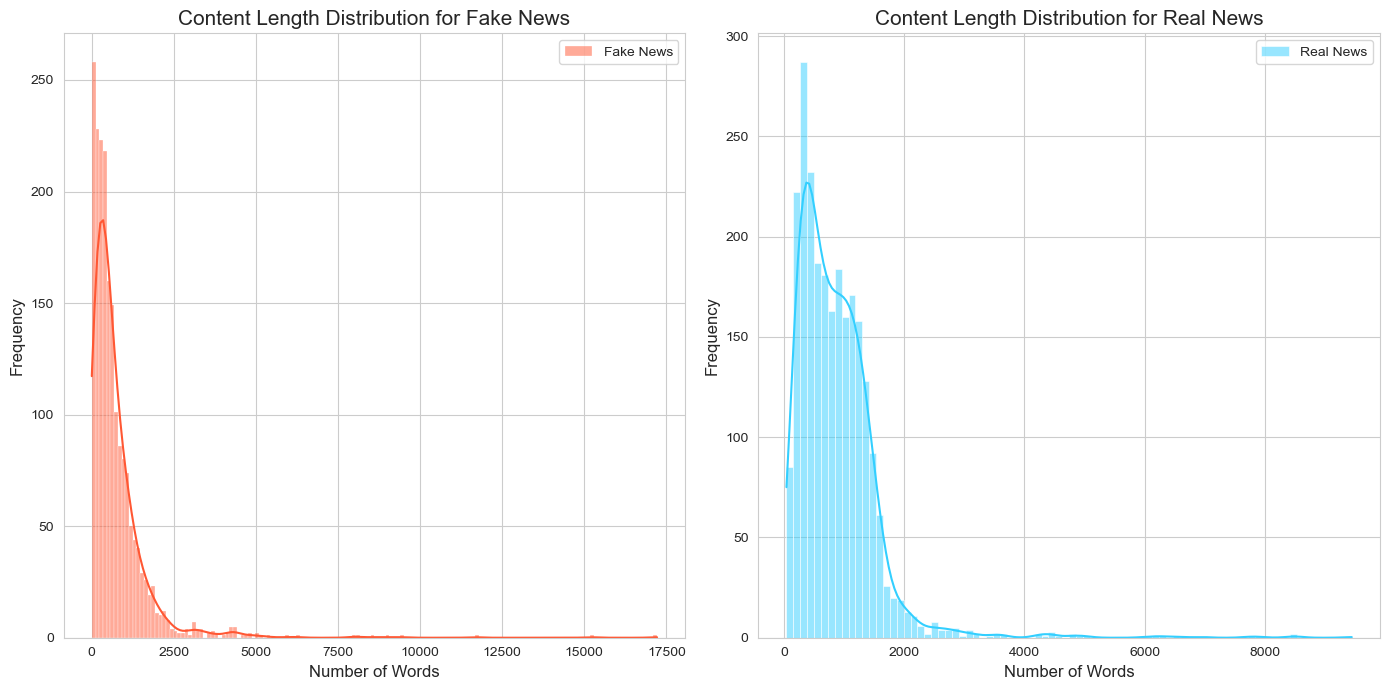

In [20]:
# Adding a new column for content length (number of words)
sample_df['content_length'] = sample_df['content'].apply(lambda text: len(text.split()))

# Adding a new column for sentiment polarity
sample_df['sentiment_polarity'] = sample_df['content'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Separate the data into fake and real news dataframes
fake_news_df = sample_df[sample_df['label'] == 1]
real_news_df = sample_df[sample_df['label'] == 0]

# Plotting the distribution of content length for fake and real news
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(fake_news_df['content_length'], color='#FF5733', label='Fake News', kde=True)
plt.title('Content Length Distribution for Fake News', fontsize=15)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(real_news_df['content_length'], color='#33CFFF', label='Real News', kde=True)
plt.title('Content Length Distribution for Real News', fontsize=15)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("D:\Important_Documents\shrey_asisgnment\Final_output\content_length.png")
plt.show()

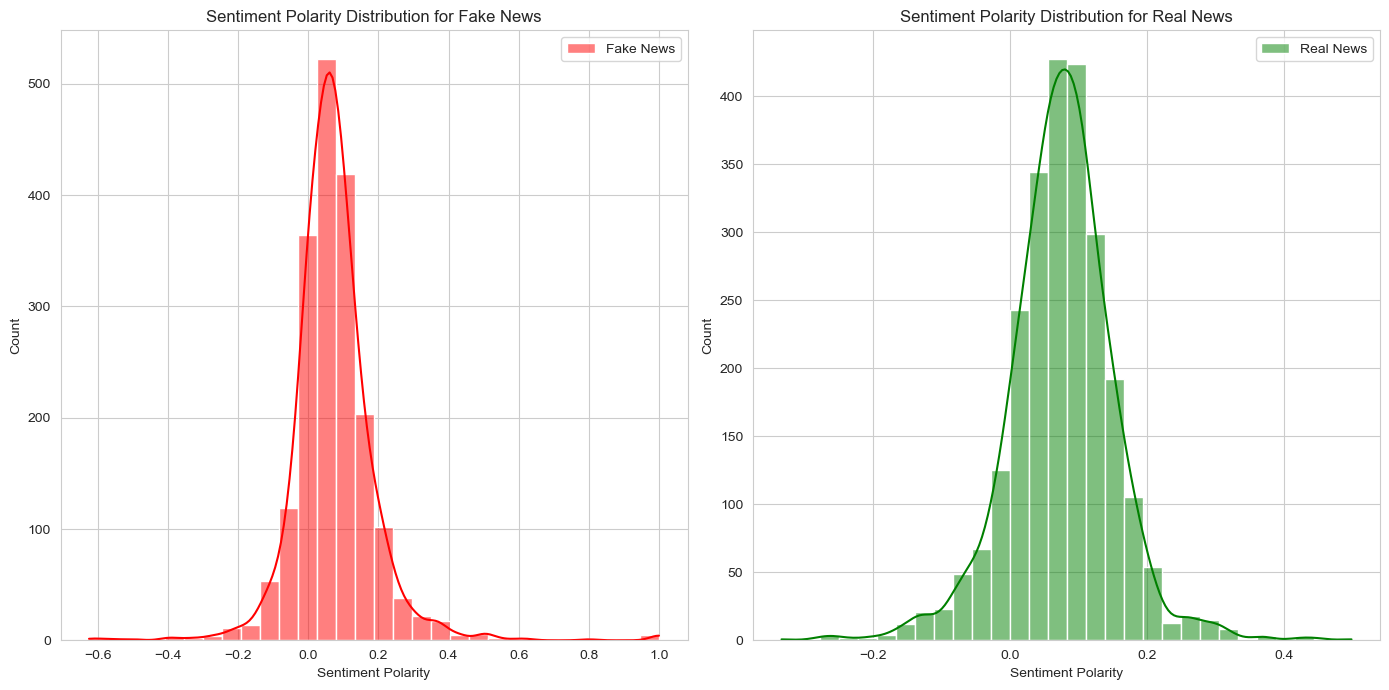

In [21]:
# Plotting the distribution of sentiment polarity for fake and real news
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(fake_news_df['sentiment_polarity'], color='red', label='Fake News', bins=30, kde=True)
plt.title('Sentiment Polarity Distribution for Fake News')
plt.xlabel('Sentiment Polarity')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(real_news_df['sentiment_polarity'], color='green', label='Real News', bins=30, kde=True)
plt.title('Sentiment Polarity Distribution for Real News')
plt.xlabel('Sentiment Polarity')
plt.legend()

plt.tight_layout()
plt.savefig("D:\Important_Documents\shrey_asisgnment\Final_output\sentiment_analysis.png")

plt.show()


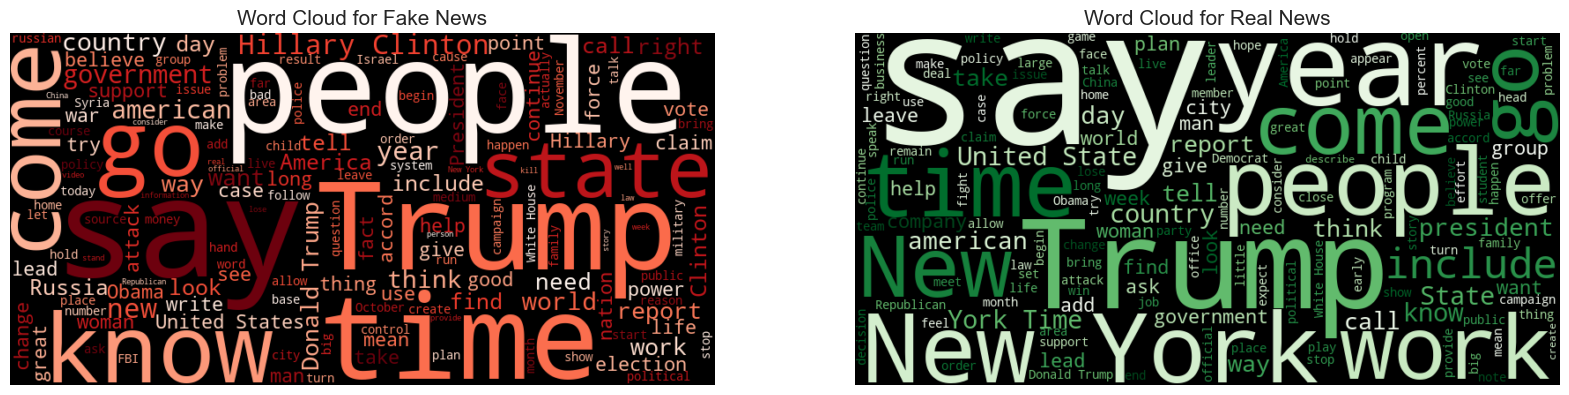

In [22]:
# Word Cloud for Fake News
fake_news_words = " ".join(fake_news_df['tokenized_content'])
real_news_words = " ".join(real_news_df['tokenized_content'])

wordcloud_fake = WordCloud(width=800, height=400, max_words=150, background_color='black', colormap='Reds').generate(fake_news_words)
wordcloud_real = WordCloud(width=800, height=400, max_words=150, background_color='black', colormap='Greens').generate(real_news_words)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News', fontsize=15)

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Real News', fontsize=15)
plt.savefig("D:\Important_Documents\shrey_asisgnment\Final_output\wordcloud.png")
plt.show()


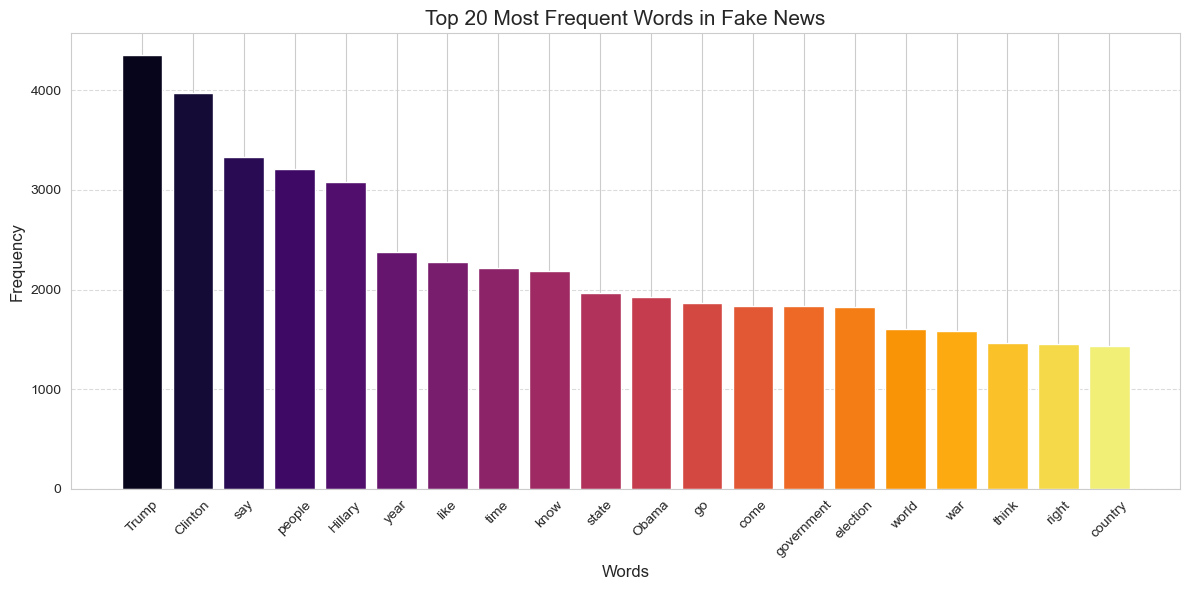

In [23]:
# Tokenize the text and calculate word frequencies for fake news
words_fake = fake_news_words.split()
word_freq_fake = Counter(words_fake)
top_words_fake = word_freq_fake.most_common(20)  # Select top 20 words

# Create a DataFrame for visualization of top words in fake news
top_words_fake_df = pd.DataFrame(top_words_fake, columns=['Word', 'Frequency'])

# Bar Plot for Fake News
plt.figure(figsize=(12, 6))
plt.bar(top_words_fake_df['Word'], top_words_fake_df['Frequency'], color=sns.color_palette('inferno', 20))
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 20 Most Frequent Words in Fake News', fontsize=15)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("D:\Important_Documents\shrey_asisgnment\Final_output\Fake_news_bar.png")
plt.show()

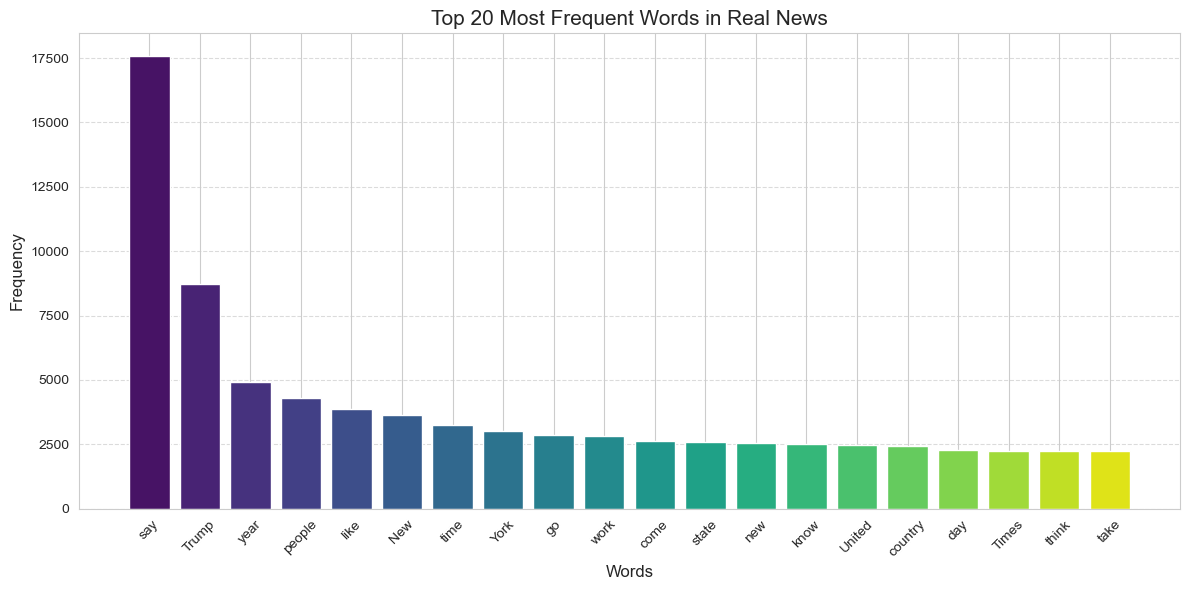

In [24]:
# Tokenize the text and calculate word frequencies for real news
words_real = real_news_words.split()
word_freq_real = Counter(words_real)
top_words_real = word_freq_real.most_common(20)  # Select top 20 words

# Create a DataFrame for visualization of top words in real news
top_words_real_df = pd.DataFrame(top_words_real, columns=['Word', 'Frequency'])

# Bar Plot for Real News
plt.figure(figsize=(12, 6))
plt.bar(top_words_real_df['Word'], top_words_real_df['Frequency'], color=sns.color_palette('viridis', 20))
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 20 Most Frequent Words in Real News', fontsize=15)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("D:\Important_Documents\shrey_asisgnment\Final_output\Real_news_bar.png")
plt.show()

In [25]:
# Model Training Phase

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import pandas as pd

# Split the DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sample_df['tokenized_content'], sample_df['label'], test_size=0.20, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize various classifiers
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gdbt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

# Dictionary of classifiers
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'Bagging': bc,
    'ExtraTrees': etc,
    'GradientBoosting': gdbt,
    'XGBoost': xgb
}

# Function to train classifiers and evaluate their performance
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

# Evaluate each classifier
performance_data = []
for name, clf in clfs.items():
    accuracy, precision, recall, f1, conf_matrix = train_classifier(clf, X_train_tfidf, y_train, X_test_tfidf, y_test)
    performance_data.append({'Algorithm': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'ConfusionMatrix': conf_matrix})

# Create a DataFrame to store performance data
performance_df = pd.DataFrame(performance_data)
print(performance_df)

           Algorithm  Accuracy  Precision    Recall        F1  \
0                SVC  0.957763   0.943850  0.956640  0.950202   
1                KNN  0.827626   0.853896  0.712737  0.776957   
2                 NB  0.735160   1.000000  0.371274  0.541502   
3                 DT  0.933790   0.910290  0.934959  0.922460   
4                 LR  0.926941   0.898172  0.932249  0.914894   
5                 RF  0.918950   0.959877  0.842818  0.897547   
6           AdaBoost  0.954338   0.941019  0.951220  0.946092   
7            Bagging  0.945205   0.923483  0.948509  0.935829   
8         ExtraTrees  0.899543   0.960656  0.794038  0.869436   
9   GradientBoosting  0.950913   0.924479  0.962060  0.942895   
10           XGBoost  0.964612   0.947090  0.970190  0.958501   

            ConfusionMatrix  
0    [[486, 21], [16, 353]]  
1   [[462, 45], [106, 263]]  
2    [[507, 0], [232, 137]]  
3    [[473, 34], [24, 345]]  
4    [[468, 39], [25, 344]]  
5    [[494, 13], [58, 311]]  
6    [[48

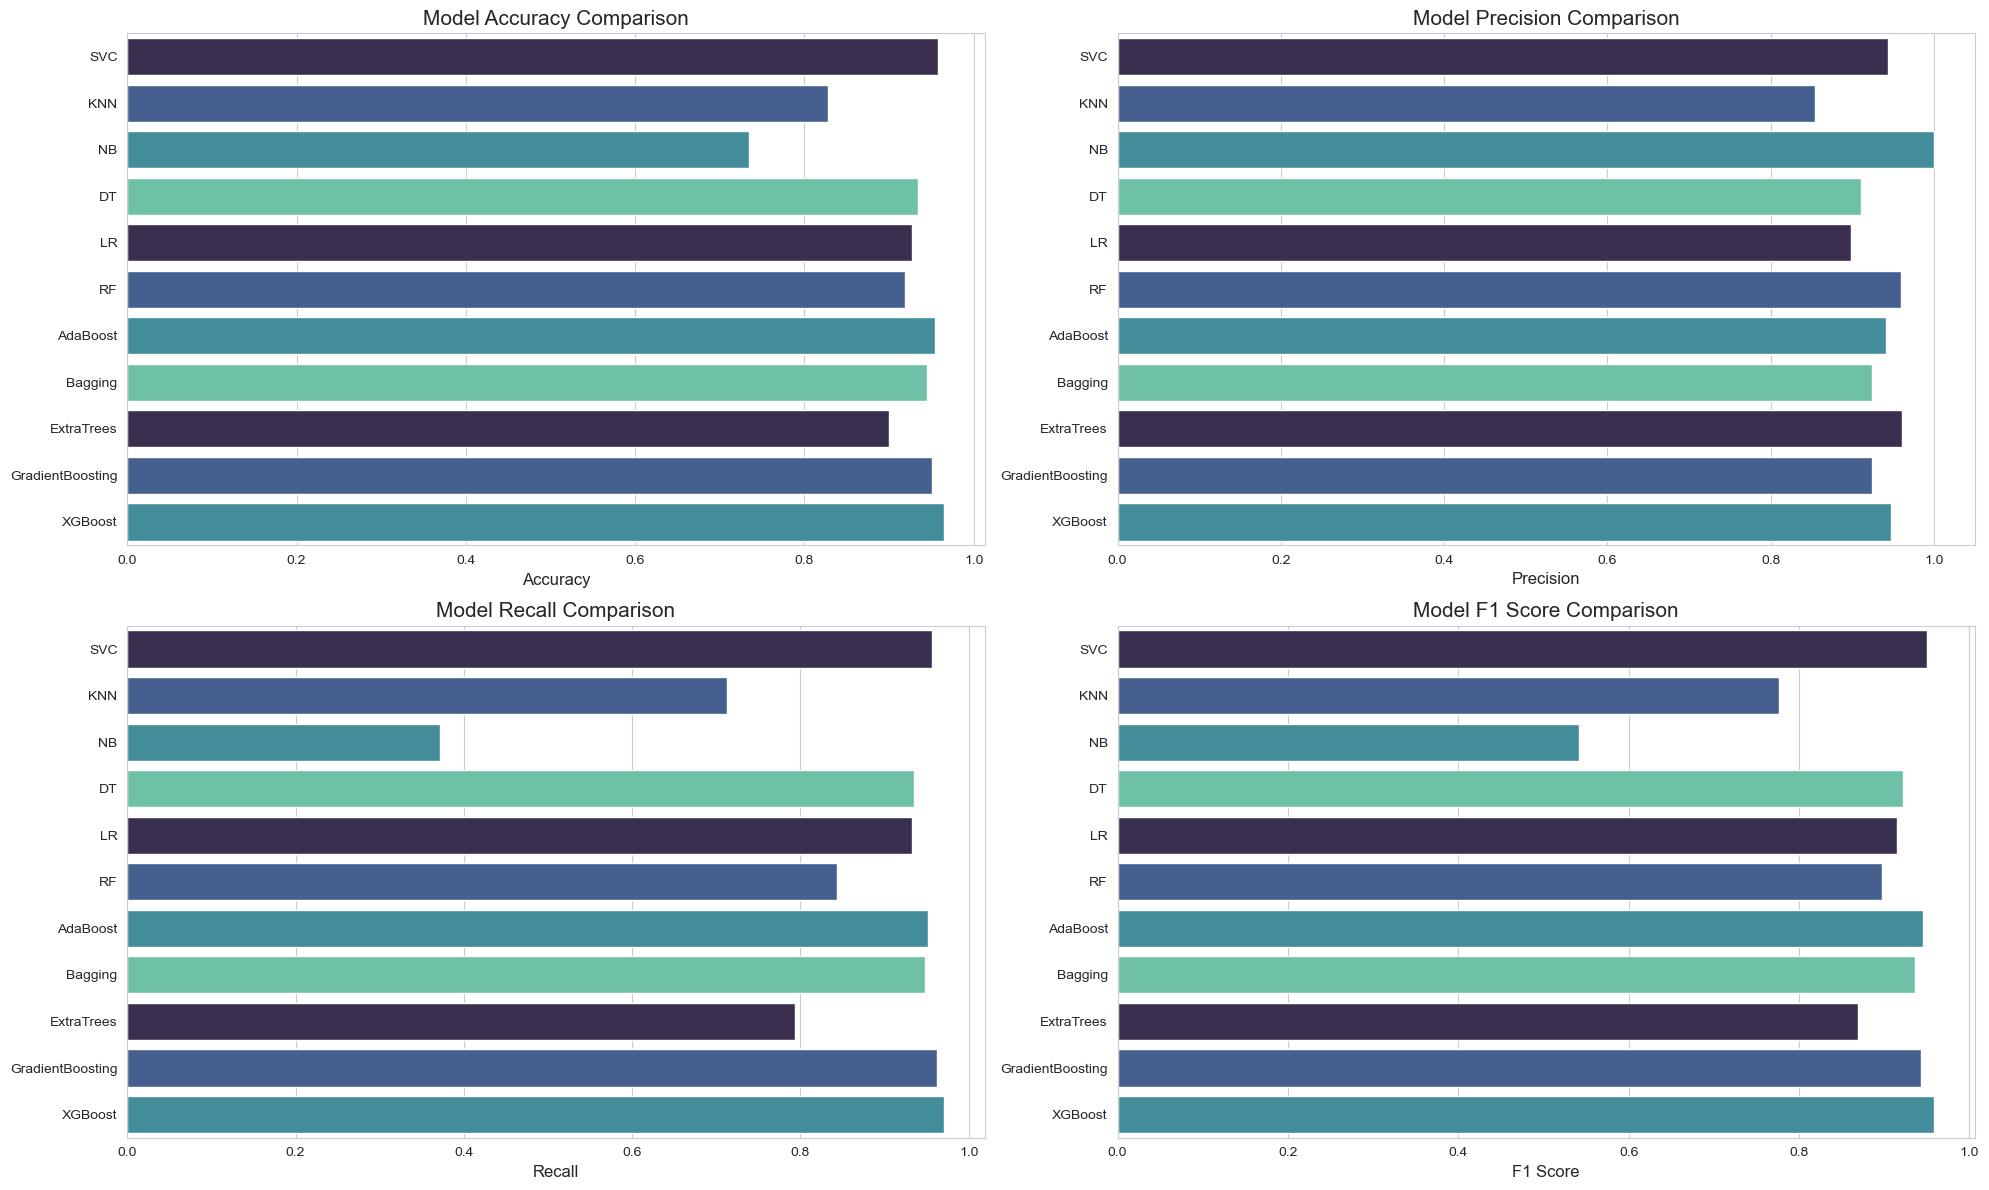

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all plots
sns.set_style("whitegrid")

# Visualizing the performance metrics
plt.figure(figsize=(20, 12))

# Define a color palette
palette = sns.color_palette("mako", n_colors=4)


# Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Accuracy', y='Algorithm', data=performance_df, palette=palette)
plt.title('Model Accuracy Comparison', fontsize=15)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('')

# Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Precision', y='Algorithm', data=performance_df, palette=palette)
plt.title('Model Precision Comparison', fontsize=15)
plt.xlabel('Precision', fontsize=12)
plt.ylabel('')

# Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Recall', y='Algorithm', data=performance_df, palette=palette)
plt.title('Model Recall Comparison', fontsize=15)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('')

# F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='F1', y='Algorithm', data=performance_df, palette=palette)
plt.title('Model F1 Score Comparison', fontsize=15)
plt.xlabel('F1 Score', fontsize=12)
plt.ylabel('')

plt.tight_layout()
plt.savefig("D:\Important_Documents\shrey_asisgnment\Final_output\performance_matrix.png")
plt.show()

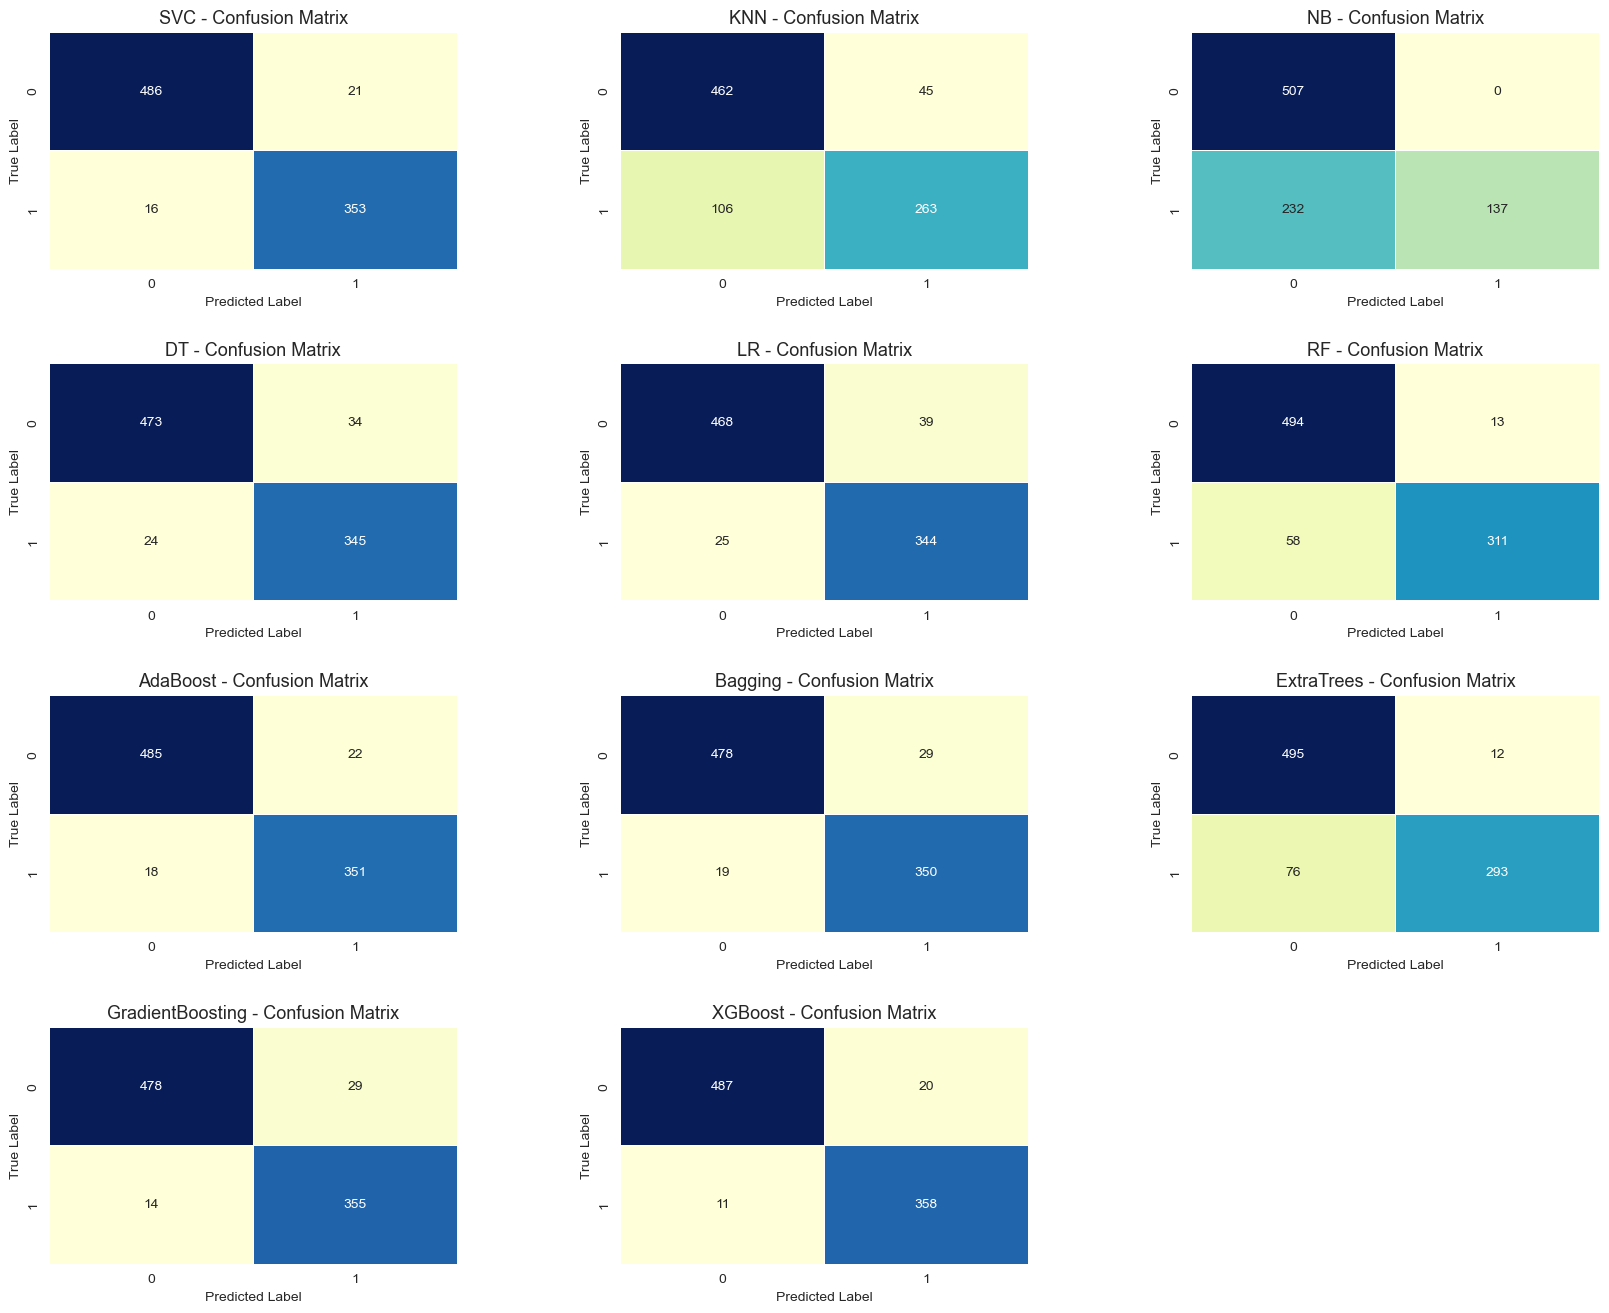

In [27]:
# Visualizing Confusion Matrices of Each Model
plt.figure(figsize=(20, 16))
n_cols = 3  # Adjust the number of columns per row

for i, row in enumerate(performance_df.itertuples()):
    plt.subplot(len(clfs) // n_cols + (len(clfs) % n_cols > 0), n_cols, i + 1)
    sns.heatmap(row.ConfusionMatrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False, linewidths=.5)
    plt.title(f'{row.Algorithm} - Confusion Matrix', fontsize=13)
    plt.xlabel('Predicted Label', fontsize=10)
    plt.ylabel('True Label', fontsize=10)

# Adjust subplot layout for better spacing
plt.subplots_adjust(hspace=0.4, wspace=0.4)
# Save the figure
plt.savefig("D:\Important_Documents\shrey_asisgnment\Final_output\confusion_matrix.png")
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, make_scorer
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [5, 7],
}

# Define the parameter grid for SVC
param_grid_svc = {
    'kernel': ['linear', 'rbf'],
}

# Define the parameter grid for ExtraTreesClassifier
param_grid_etc = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
}

# Define the classifiers
xgb = XGBClassifier()
svc = SVC()
etc = ExtraTreesClassifier()

# Define precision as the scoring metric for GridSearchCV
precision_scorer = make_scorer(precision_score)

# Instantiate GridSearchCV for each classifier
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring=precision_scorer, cv=5)
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, scoring=precision_scorer, cv=5)
grid_search_etc = GridSearchCV(estimator=etc, param_grid=param_grid_etc, scoring=precision_scorer, cv=5)

# Perform GridSearchCV for each classifier
grid_search_xgb.fit(X_train_tfidf, y_train)
grid_search_svc.fit(X_train_tfidf, y_train)
grid_search_etc.fit(X_train_tfidf, y_train)

# Get the best parameters and the best models
best_params_xgb = grid_search_xgb.best_params_
best_params_svc = grid_search_svc.best_params_
best_params_etc = grid_search_etc.best_params_

best_xgb = grid_search_xgb.best_estimator_
best_svc = grid_search_svc.best_estimator_
best_etc = grid_search_etc.best_estimator_

# Evaluate the best models
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, conf_matrix_xgb = train_classifier(best_xgb, X_train_tfidf, y_train, X_test_tfidf, y_test)
accuracy_svc, precision_svc, recall_svc, f1_svc, conf_matrix_svc = train_classifier(best_svc, X_train_tfidf, y_train, X_test_tfidf, y_test)
accuracy_etc, precision_etc, recall_etc, f1_etc, conf_matrix_etc = train_classifier(best_etc, X_train_tfidf, y_train, X_test_tfidf, y_test)

# Print the results
print("Best Parameters for XGBClassifier:", best_params_xgb)
print("Performance Metrics for Best XGBClassifier Model:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")
print(f"Confusion Matrix:\n{conf_matrix_xgb}")

print("\nBest Parameters for SVC:", best_params_svc)
print("Performance Metrics for Best SVC Model:")
print(f"Accuracy: {accuracy_svc}")
print(f"Precision: {precision_svc}")
print(f"Recall: {recall_svc}")
print(f"F1 Score: {f1_svc}")
print(f"Confusion Matrix:\n{conf_matrix_svc}")

print("\nBest Parameters for ExtraTreesClassifier:", best_params_etc)
print("Performance Metrics for Best ExtraTreesClassifier Model:")
print(f"Accuracy: {accuracy_etc}")
print(f"Precision: {precision_etc}")
print(f"Recall: {recall_etc}")
print(f"F1 Score: {f1_etc}")
print(f"Confusion Matrix:\n{conf_matrix_etc}")

Best Parameters for XGBClassifier: {'max_depth': 5, 'n_estimators': 100}
Performance Metrics for Best XGBClassifier Model:
Accuracy: 0.9668949771689498
Precision: 0.9497354497354498
Recall: 0.9728997289972899
F1 Score: 0.9611780455153949
Confusion Matrix:
[[488  19]
 [ 10 359]]

Best Parameters for SVC: {'kernel': 'rbf'}
Performance Metrics for Best SVC Model:
Accuracy: 0.9646118721461188
Precision: 0.9668508287292817
Recall: 0.948509485094851
F1 Score: 0.957592339261286
Confusion Matrix:
[[495  12]
 [ 19 350]]

Best Parameters for ExtraTreesClassifier: {'max_depth': 5, 'n_estimators': 50}
Performance Metrics for Best ExtraTreesClassifier Model:
Accuracy: 0.5810502283105022
Precision: 1.0
Recall: 0.005420054200542005
F1 Score: 0.010781671159029648
Confusion Matrix:
[[507   0]
 [367   2]]
